In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import wget
import seaborn as sns
import ipywidgets as pywidgets

from ipywidgets import interact
from itertools import combinations

# Download data

In [4]:
a_file = wget.download('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
with open(a_file) as f:
    dataframe = pd.read_csv(f, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                                     'marital-status', 'occupation', 'relationship', 'race', 'sex',
                                     'capital-gain', 'capital-loss', 'hours-per-week',
                                     'native-country', '>50K,<=50K'])
dataframe

In [18]:
def factor(column_name):
    global dataframe
    dataframe[column_name] = pd.factorize(dataframe[column_name])[0] + 1
    

# dataframe = dataframe.drop(columns=['>50K,<=50K'])
factor('workclass')
factor('education')
factor('marital-status')
factor('occupation')
factor('relationship')
factor('race')
factor('sex')
factor('native-country')
dataframe

age  workclass  fnlwgt  education  education-num  marital-status  \
0       39          1   77516          1             13               1   
1       50          2   83311          1             13               2   
2       38          3  215646          2              9               3   
3       53          3  234721          3              7               2   
4       28          3  338409          1             13               2   
5       37          3  284582          4             14               2   
6       49          3  160187          5              5               4   
7       52          2  209642          2              9               2   
8       31          3   45781          4             14               1   
9       42          3  159449          1             13               2   
10      37          3  280464          6             10               2   
11      30          1  141297          1             13               2   
12      23          3  122272          1             13               1   
13      32          3  205019          7             12               1   
14      40          3  121772          8             11               2   
15      34          3  245487          9              4               2   
16      25          2  176756          2              9               1   
17      32          3  186824          2              9               1   
18      38          3   28887          3              7               2   
19      43          2  292175          4             14               3   
20      40          3  193524         10             16               2   
21      54          3  302146          2              9               5   
22      35          4   76845          5              5               2   
23      43          3  117037          3              7               2   
24      59          3  109015          2              9               3   
25      56          5  216851          1             13               2   
26      19          3  168294          2              9               1   
27      54          6  180211          6             10               2   
28      39          3  367260          2              9               3   
29      49          3  193366          2              9               2   
...    ...        ...     ...        ...            ...             ...   
32531   30          6   33811          1             13               1   
32532   34          3  204461         10             16               2   
32533   54          3  337992          1             13               2   
32534   37          3  179137          6             10               3   
32535   22          3  325033         16              8               1   
32536   34          3  160216          1             13               1   
32537   30          3  345898          2              9               1   
32538   38          3  139180          1             13               3   
32539   71          6  287372         10             16               2   
32540   45          1  252208          2              9               5   
32541   41          6  202822          2              9               5   
32542   72          6  129912          2              9               2   
32543   45          5  119199          7             12               3   
32544   31          3  199655          4             14               3   
32545   39          5  111499          7             12               2   
32546   37          3  198216          7             12               3   
32547   43          3  260761          2              9               2   
32548   65          2   99359         11             15               1   
32549   43          1  255835          6             10               3   
32550   43          2   27242          6             10               2   
32551   32          3   34066         13              6               2   
32552   43          3   84661   

In [20]:
dataframe.describe()

age     workclass        fnlwgt     education  education-num  \
count  32561.000000  32561.000000  3.256100e+04  32561.000000   32561.000000   
mean      38.581647      3.309972  1.897784e+05      4.424465      10.080679   
std       13.640433      1.225728  1.055500e+05      3.453582       2.572720   
min       17.000000      1.000000  1.228500e+04      1.000000       1.000000   
25%       28.000000      3.000000  1.178270e+05      2.000000       9.000000   
50%       37.000000      3.000000  1.783560e+05      3.000000      10.000000   
75%       48.000000      3.000000  2.370510e+05      6.000000      12.000000   
max       90.000000      9.000000  1.484705e+06     16.000000      16.000000   

       marital-status    occupation  relationship          race           sex  \
count    32561.000000  32561.000000  32561.000000  32561.000000  32561.000000   
mean         2.083781      5.666411      2.542397      1.221707      1.330795   
std          1.251381      3.386119      1.437431      0.627348      0.470506   
min          1.000000      1.000000      1.000000      1.000000      1.000000   
25%          1.000000      3.000000      1.000000      1.000000      1.000000   
50%          2.000000      5.000000      2.000000      1.000000      1.000000   
75%          2.000000      8.000000      4.000000      1.000000      2.000000   
max          7.000000     15.000000      6.000000      5.000000      2.000000   

       capital-gain  capital-loss  hours-per-week  native-country  
count  32561.000000  32561.000000    32561.000000    32561.000000  
mean    1077.648844     87.303830       40.437456        2.290317  
std     7385.292085    402.960219       12.347429        5.045373  
min        0.000000      0.000000        1.000000        1.000000  
25%        0.000000      0.000000       40.000000        1.000000  
50%        0.000000      0.000000       40.000000        1.000000  
75%        0.000000      0.000000       45.000000        1.000000  
max    99999.000000   4356.000000       99.000000       42.000000

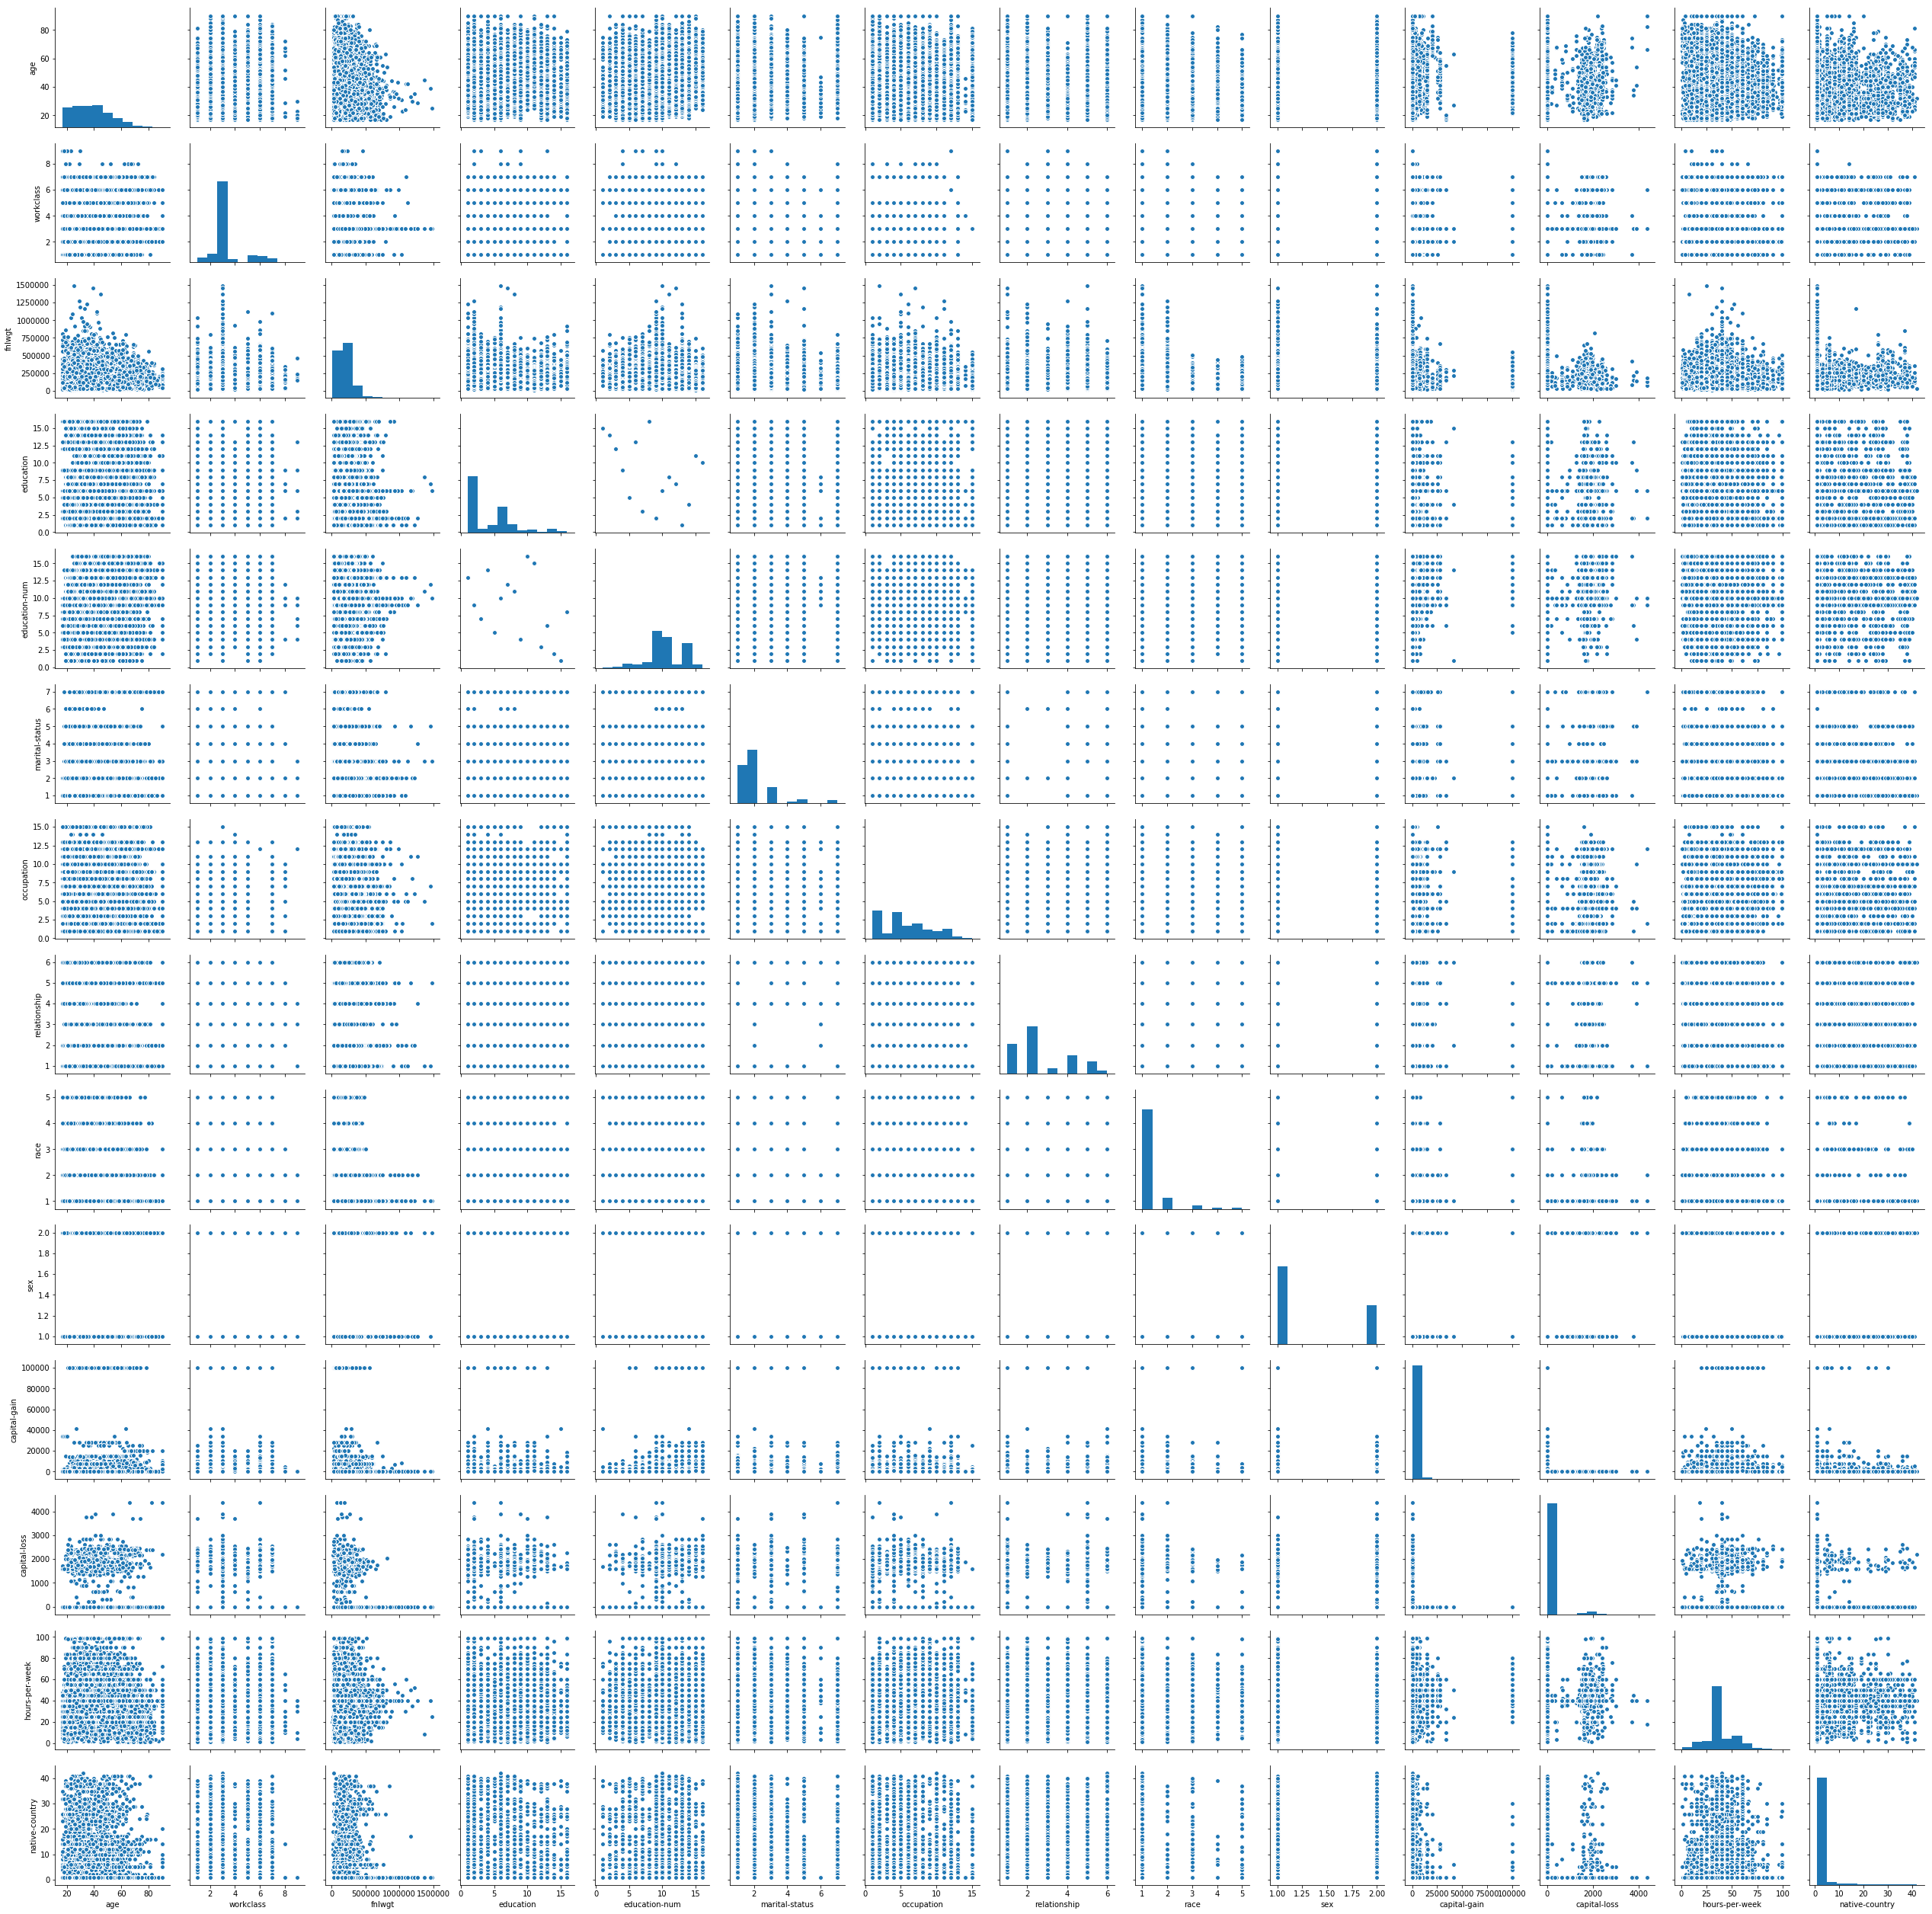

In [21]:
sns.pairplot(dataframe)

In [22]:
columns = list(dataframe.columns)
dropdown_1 = pywidgets.Dropdown(
    options=columns,
    value=columns[0],
    description='Column 1:',
    disabled=False,
)
dropdown_2 = pywidgets.Dropdown(
    options=columns,
    value=columns[1],
    description='Column 2:',
    disabled=False,
)

In [23]:
@interact(column_1=dropdown_1, column_2=dropdown_2)
def plot_jointly(column_1, column_2):
    sns.jointplot(x=column_1, y=column_2, data=dataframe)

interactive(children=(Dropdown(description='Column 1:', options=('age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'), value='age'), Dropdown(description='Column 2:', index=1, options=('age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'), value='workclass'), Output()), _dom_classes=('widget-interact',))

In [24]:
dataframe.corr()

age  workclass    fnlwgt  education  education-num  \
age             1.000000   0.082380 -0.076646   0.007767       0.036527   
workclass       0.082380   1.000000 -0.006314   0.011666       0.011343   
fnlwgt         -0.076646  -0.006314  1.000000   0.024188      -0.043195   
education       0.007767   0.011666  0.024188   1.000000      -0.279614   
education-num   0.036527   0.011343 -0.043195  -0.279614       1.000000   
marital-status  0.424606   0.035949 -0.023527   0.008507      -0.065996   
occupation      0.017201   0.217072  0.007892   0.074961      -0.242997   
relationship   -0.217767   0.015524  0.017142   0.044319      -0.141075   
race           -0.040000   0.009359  0.000500   0.029638      -0.039760   
sex            -0.088832   0.019347 -0.026858   0.000550      -0.012280   
capital-gain    0.077674   0.041172  0.000432   0.024154       0.122630   
capital-loss    0.057775   0.012510 -0.010252  -0.003192       0.079923   
hours-per-week  0.068756  -0.028084 -0.018768  -0.050025       0.148123   
native-country -0.011572  -0.010246  0.035910   0.067619      -0.066044   

                marital-status  occupation  relationship      race       sex  \
age                   0.424606    0.017201     -0.217767 -0.040000 -0.088832   
workclass             0.035949    0.217072      0.015524  0.009359  0.019347   
fnlwgt               -0.023527    0.007892      0.017142  0.000500 -0.026858   
education             0.008507    0.074961      0.044319  0.029638  0.000550   
education-num        -0.065996   -0.242997     -0.141075 -0.039760 -0.012280   
marital-status        1.000000    0.006524      0.029083  0.012722  0.181870   
occupation            0.006524    1.000000     -0.016150  0.016586 -0.147779   
relationship          0.029083   -0.016150      1.000000  0.096808  0.273414   
race                  0.012722    0.016586      0.096808  1.000000  0.067840   
sex                   0.181870   -0.147779      0.273414  0.067840  1.000000   
capital-gain          0.004460   -0.045060     -0.044045 -0.007991 -0.048480   
capital-loss          0.006833   -0.023963     -0.050498 -0.017190 -0.045567   
hours-per-week       -0.000277   -0.045240     -0.184873 -0.033115 -0.229309   
native-country        0.001912    0.019578      0.042444  0.241650  0.005977   

                capital-gain  capital-loss  hours-per-week  native-country  
age                 0.077674      0.057775        0.068756       -0.011572  
workclass           0.041172      0.012510       -0.028084       -0.010246  
fnlwgt              0.000432     -0.010252       -0.018768        0.035910  
education           0.024154     -0.003192       -0.050025        0.067619  
education-num       0.122630      0.079923        0.148123       -0.066044  
marital-status      0.004460      0.006833       -0.000277        0.001912  
occupation         -0.045060     -0.023963       -0.045240        0.019578  
relationship       -0.044045     -0.050498       -0.184873        0.042444  
race               -0.007991     -0.017190       -0.033115        0.241650  
sex                -0.048480     -0.045567       -0.229309        0.005977  
capital-gain        1.000000     -0.031615        0.078409       -0.009131  
capital-loss       -0.031615      1.000000        0.054256       -0.004373  
hours-per-week      0.078409      0.054256        1.000000       -0.009662  
native-country     -0.009131     -0.004373       -0.009662        1.000000

In [25]:
dataframe.cov()

age   workclass        fnlwgt    education  \
age                186.061400    1.377348 -1.103507e+05     0.365880   
workclass            1.377348    1.502409 -8.168314e+02     0.049382   
fnlwgt         -110350.685300 -816.831364  1.114080e+10  8817.284442   
education            0.365880    0.049382  8.817284e+03    11.927226   
education-num        1.281849    0.035771 -1.172953e+04    -2.484400   
marital-status       7.247766    0.055141 -3.107487e+03     0.036765   
occupation           0.794498    0.900950  2.820651e+03     0.876614   
relationship        -4.269793    0.027352  2.600764e+03     0.220010   
race                -0.342288    0.007196  3.309715e+01     0.064213   
sex                 -0.570114    0.011158 -1.333823e+03     0.000893   
capital-gain      7824.818537  372.699730  3.366625e+05   616.077099   
capital-loss       317.560742    6.178853 -4.360303e+05    -4.442421   
hours-per-week      11.580130   -0.425038 -2.446043e+04    -2.133203   
native-country      -0.796385   -0.063365  1.912357e+04     1.178241   

                education-num  marital-status   occupation  relationship  \
age                  1.281849        7.247766     0.794498     -4.269793   
workclass            0.035771        0.055141     0.900950      0.027352   
fnlwgt          -11729.527298    -3107.487250  2820.650984   2600.764098   
education           -2.484400        0.036765     0.876614      0.220010   
education-num        6.618890       -0.212472    -2.116881     -0.521710   
marital-status      -0.212472        1.565953     0.027642      0.052314   
occupation          -2.116881        0.027642    11.465803     -0.078608   
relationship        -0.521710        0.052314    -0.078608      2.066208   
race                -0.064172        0.009987     0.035233      0.087298   
sex                 -0.014865        0.107082    -0.235439      0.184915   
capital-gain      2330.007877       41.222542 -1126.843620   -467.572765   
capital-loss        82.856445        3.445551   -32.696523    -29.249845   
hours-per-week       4.705338       -0.004281    -1.891473     -3.281232   
native-country      -0.857268        0.012071     0.334472      0.307823   

                     race          sex  capital-gain   capital-loss  \
age             -0.342288    -0.570114  7.824819e+03     317.560742   
workclass        0.007196     0.011158  3.726997e+02       6.178853   
fnlwgt          33.097148 -1333.822718  3.366625e+05 -436030.333167   
education        0.064213     0.000893  6.160771e+02      -4.442421   
education-num   -0.064172    -0.014865  2.330008e+03      82.856445   
marital-status   0.009987     0.107082  4.122254e+01       3.445551   
occupation       0.035233    -0.235439 -1.126844e+03     -32.696523   
relationship     0.087298     0.184915 -4.675728e+02     -29.249845   
race             0.393566     0.020024 -3.702454e+01      -4.345465   
sex              0.020024     0.221376 -1.684584e+02      -8.639360   
capital-gain   -37.024539  -168.458406  5.454254e+07  -94085.760688   
capital-loss    -4.345465    -8.639360 -9.408576e+04  162376.937814   
hours-per-week  -0.256511    -1.332182  7.150032e+03     269.953755   
native-country   0.764871     0.014189 -3.402356e+02      -8.890083   

                hours-per-week  native-country  
age                  11.580130       -0.796385  
workclass            -0.425038       -0.063365  
fnlwgt           -24460.426185    19123.574550  
education            -2.133203        1.178241  
education-num         4.705338       -0.857268  
marital-status       -0.004281        0.012071  
occupation           -1.891473        0.334472  
relationship         -3.281232        0.307823  
race                 -0.256511        0.764871  
sex                  -1.332182        0.014189  
capital-gain       7150.032029     -340.235612  
capital-loss        269.953755       -8.890083  
hours-per-week      152.458995       -0.601943  
native-country       -0.601943       25.455794